<a href="https://colab.research.google.com/github/thanhle3968/optimal_theory_pair_trading/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## Theory

### Example 1: Giải hệ phương trình tuyến tính



Giải phương trình m = a * x_1 + b * x_2 + c * x_3. Tìm x_1, x_2, x_3?


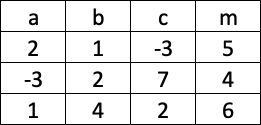

In [ ]:
#--------------------------------------------------------------------------------------------------#
# 2 * x_1 + 1 * x_2 + 3 * x_3 = 5
# -3 * x_1 + 2 * x_2 + 7 * x_3 = 4
# 1 * x_1 + 4 * x_2 + 2 * x_3 = 6

#7x_2 + 6x_3 = 15
#14x_2 + 13x_3 = 22

# x_3 = -8



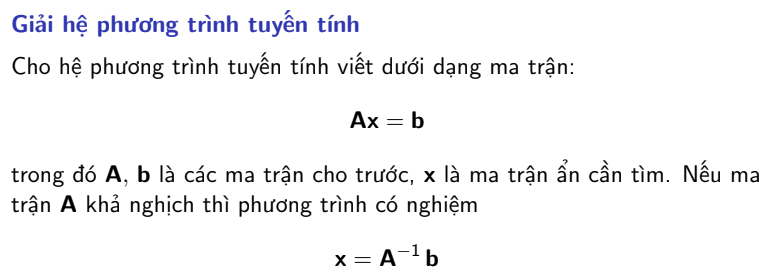

In [ ]:
#--------------------------------------------------------------------------------------------------#

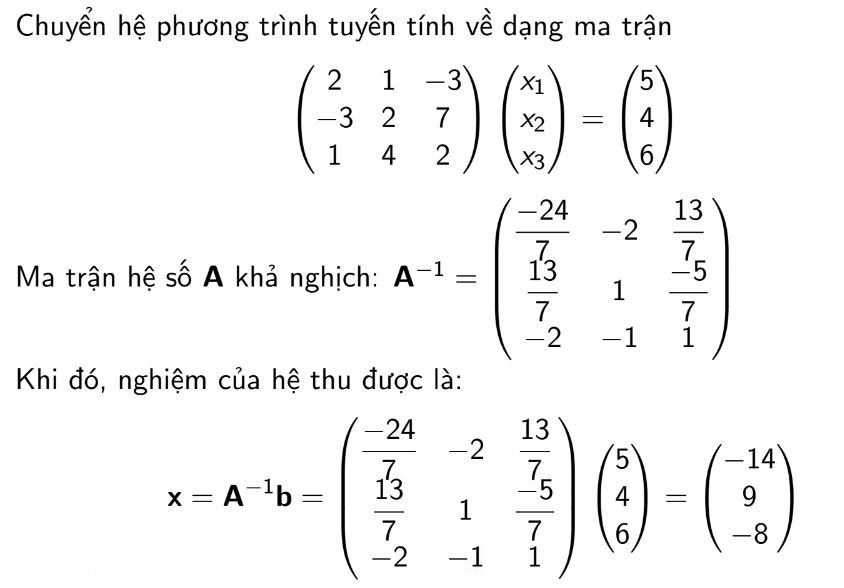

In [ ]:
import numpy as np
A = np.array([
    [2, 1, -3],
    [-3, 2, 7],
    [1, 4, 2]
])
b = np.array([
    [5],
    [4],
    [6]
])

A_inv = np.linalg.inv(A)
x = A_inv @ b
x

array([[-14.],
       [  9.],
       [ -8.]])

### Example 2


Giải phương trình m = a * x_1 + b * x_2 + c * x_3. Tìm x_1, x_2, x_3?

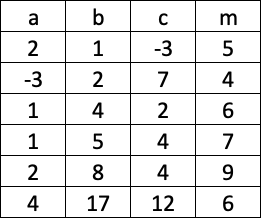

In [ ]:
A = np.array([
    [2, 1, -3],
    [-3, 2, 7],
    [1, 4, 2],
    [1, 5, 4],
    [2, 8, 4],
    [4, 17, 12]
])
b = np.array([
    [5],
    [4],
    [6],
    [7],
    [9],
    [6]
])

A_inv = np.linalg.inv(A)
x = A_inv @ b
x

LinAlgError: ignored

#### Define problem
**Need to find**: $x_1, x_2, x_3$

With:

$
f(a, b, c) = a x_1 + b x_2 + c x_3
$


=> Minimize: 

$
\sum_{a, b, c}(f(a, b, c) - z(a, b, c))^2
$

#### Hàm mất mát và điểm cực tiểu

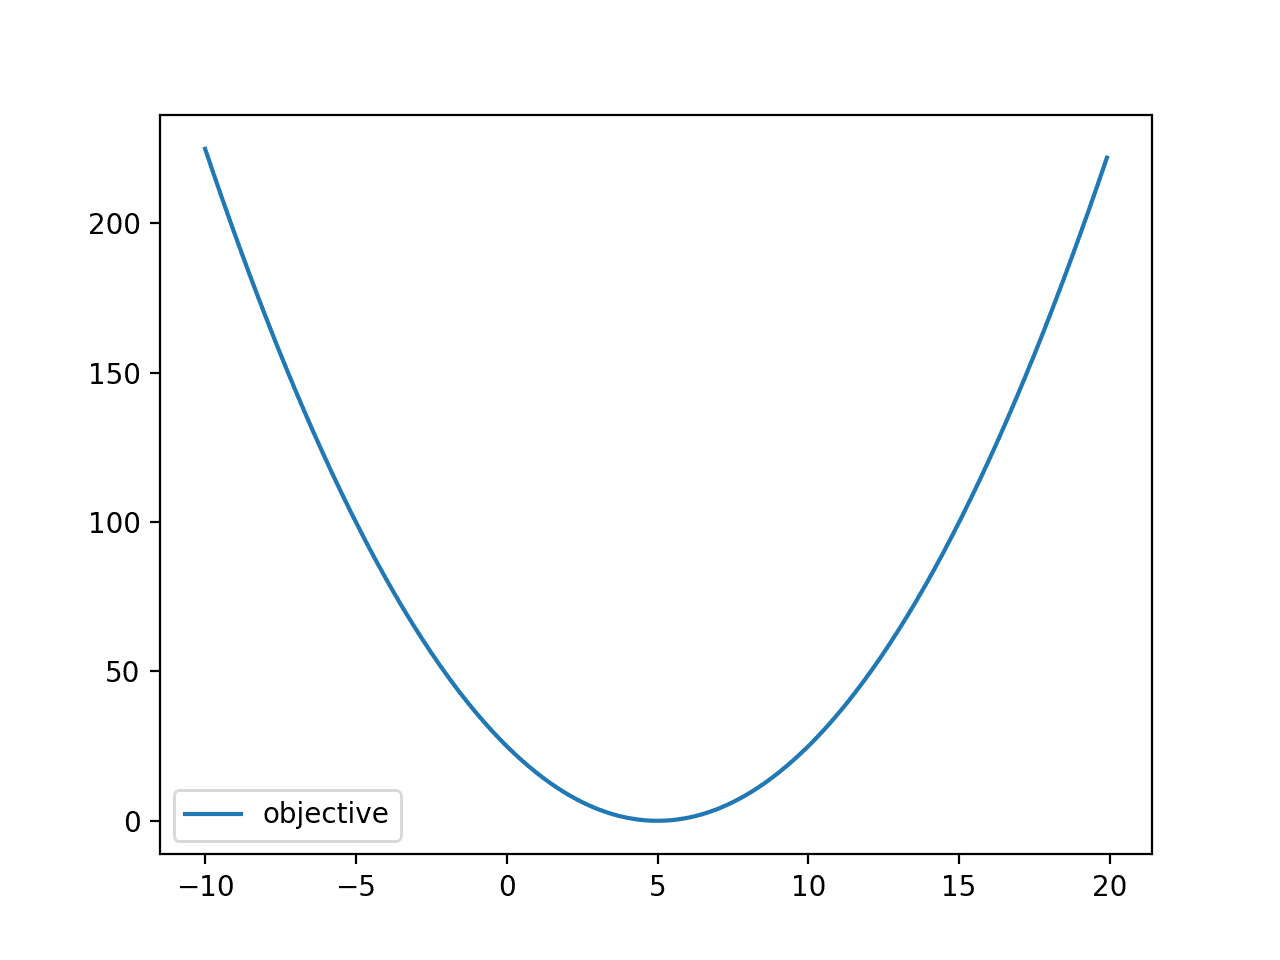

Tìm được nghiệm $x_1, x_2, x_3$ bằng cách lấy đạo hàm của hàm mất mát và giải phương trình đạo hàm bằng 0. Thu được nghiệm:

$$
(B^TB)^{-1}B^Ty
$$

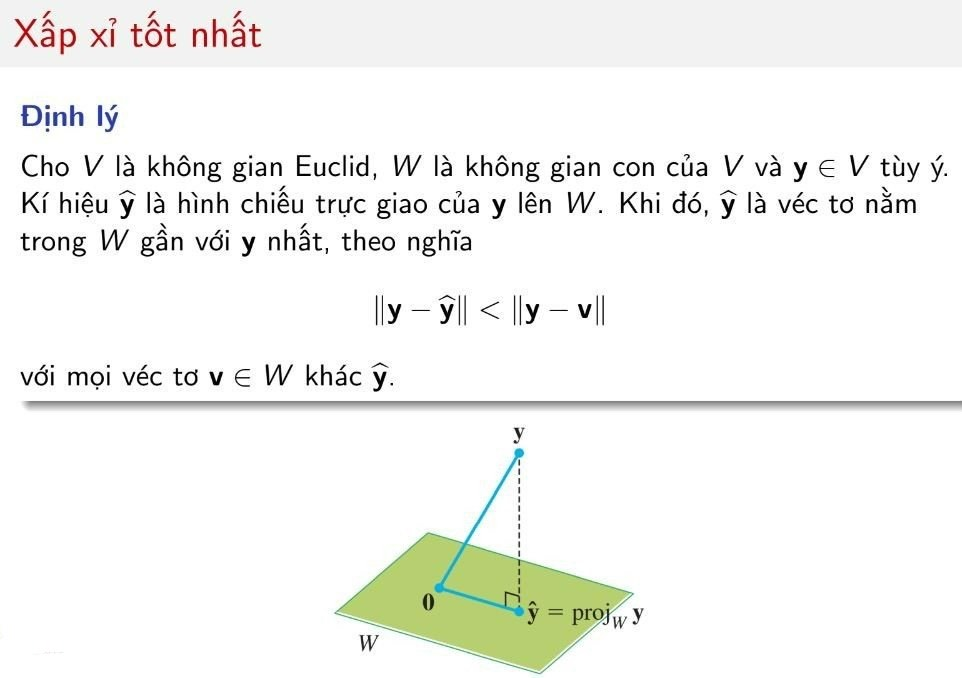

In [ ]:
# giải bài toán bằng numpy
A = np.array([
    [2, 1, -3],
    [-3, 2, 7],
    [1, 4, 2],
    [1, 5, 4],
    [2, 8, 4],
    [4, 17, 12]
])
b = np.array([
    [5],
    [4],
    [6],
    [7],
    [9],
    [6]
])

A_inv = np.linalg.pinv(A)
x = A_inv @ b
x

array([[-7.84289447],
       [ 5.42552265],
       [-4.43914883]])

In [ ]:
b_predict = A @ x
b_predict

array([[3.05718019],
       [3.30568691],
       [4.98089846],
       [1.52812344],
       [9.96179691],
       [7.59252115]])

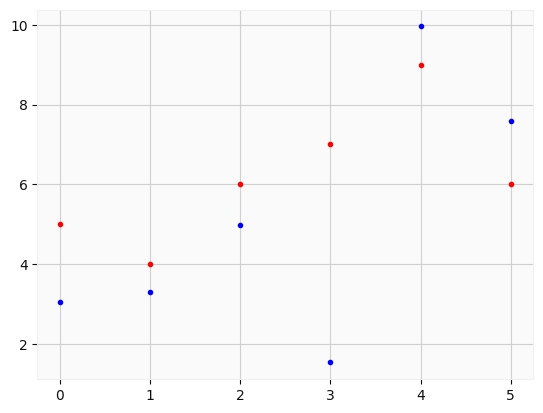

In [ ]:
plt.plot(b, '.r')
plt.plot(b_predict, '.b')
plt.show()

In [ ]:
# metrics
# rmse
mean_squared_error(b, b_predict, squared=False)

2.5396127464519602

#### Gradient 

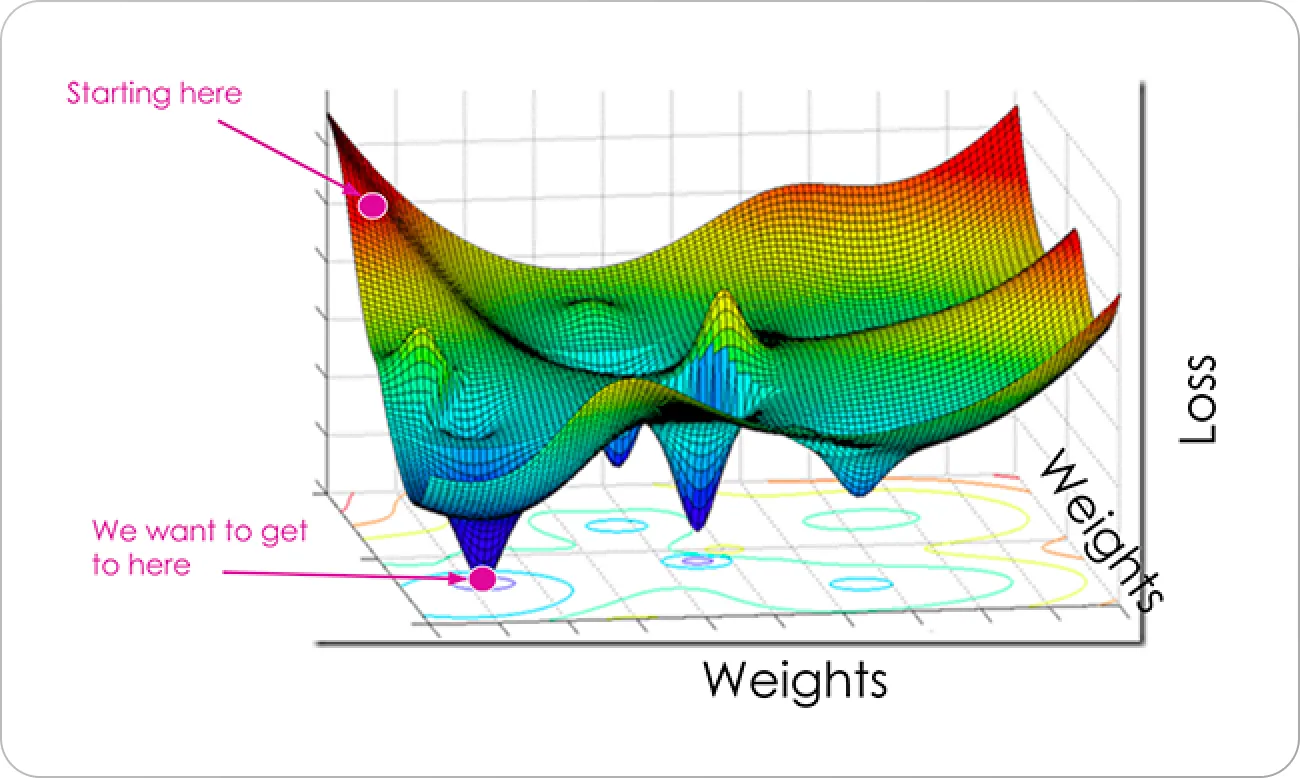

https://www.deeplearning.ai/ai-notes/optimization/index.html

### Phát biểu bài toán linear regression

# Backtest

In [ ]:
#install
!pip install backtesting
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173817 sha256=2dac0c7e29b7b046d82851e5120b5bd014f8c30f8624414643735a41f7ca38de
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
#prepair data
!gdown https://drive.google.com/uc?id=1PukTR0oD53IOiovrV8XncSqkfa2Jj-f3

Downloading...
From: https://drive.google.com/uc?id=1PukTR0oD53IOiovrV8XncSqkfa2Jj-f3
To: /content/tcb_data_feature.csv
100% 600k/600k [00:00<00:00, 100MB/s]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import mplfinance as mplf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path = "/content/tcb_data_feature.csv"

In [ ]:
tcb_data_feature = pd.read_csv(data_path)
tcb_data_feature['TradingDate'] = pd.to_datetime(tcb_data_feature['TradingDate'])
tcb_data_feature.set_index('TradingDate', inplace=True)

In [ ]:
tcb_data_feature.tail()

,Open,High,Low,Close,Volume,close_open_diff,high_close_diff,low_close_diff,high_open_diff,low_open_diff,...,bollinger_lband_20,bollinger_hband_20,ema_12,ema_26,close_t1,close_t2,close_t3,open_t1,open_t2,open_t3
TradingDate,,,,,,,,,,,,,,,,,,,,,
2023-04-27,30200.0,30200.0,29850.0,29900.0,2032454,-300.0,300.0,-50.0,0.0,-350.0,...,28299.276536,30675.723464,29384.351618,28957.793448,29500.0,29050.0,28700.0,29950.0,29500.0,29050.0
2023-04-28,29950.0,29950.0,29500.0,29500.0,2478528,-450.0,450.0,0.0,0.0,-450.0,...,28477.339005,30612.660995,29402.143677,28997.956896,29050.0,28700.0,29400.0,29500.0,29050.0,28900.0
2023-05-04,29500.0,29500.0,28900.0,29050.0,1918703,-450.0,450.0,-150.0,0.0,-600.0,...,28447.937876,30617.062124,29347.967727,29001.811941,28700.0,29400.0,NaN,29050.0,28900.0,NaN
2023-05-05,29050.0,29200.0,28450.0,28700.0,3438755,-350.0,500.0,-250.0,150.0,-600.0,...,28348.701504,30636.298496,29248.280384,28979.455501,29400.0,NaN,NaN,28900.0,NaN,NaN
2023-05-08,28900.0,29400.0,28700.0,29400.0,2847866,500.0,0.0,-700.0,500.0,-200.0,...,28343.002294,30631.997706,29271.621863,29010.606945,NaN,NaN,NaN,NaN,NaN,NaN


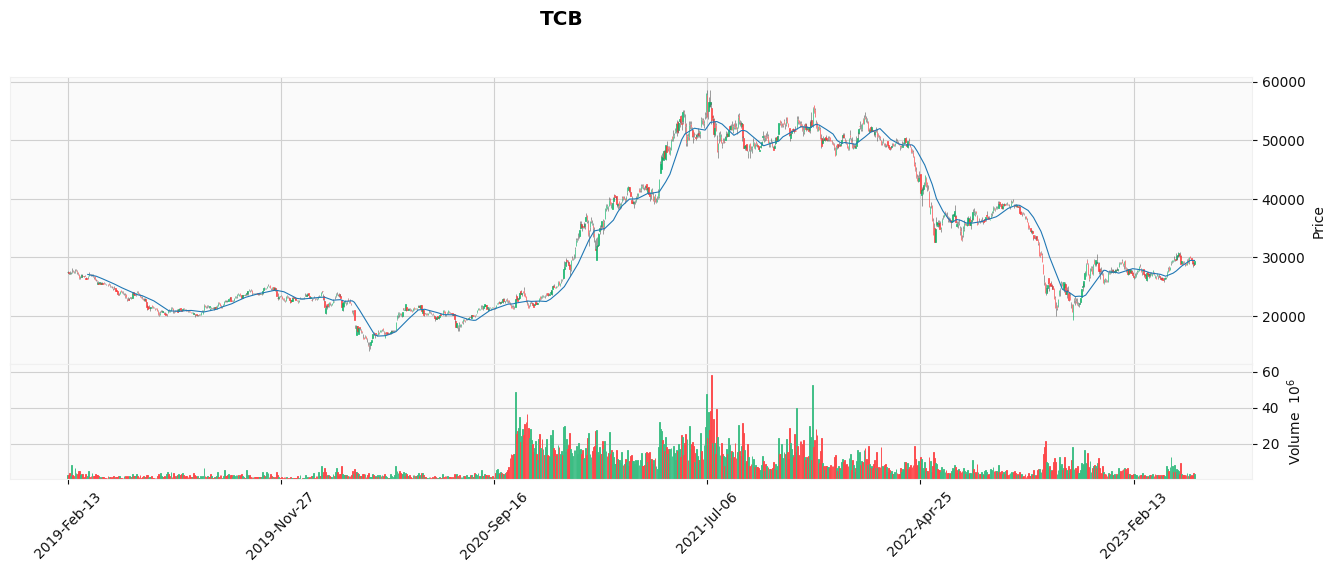

In [ ]:
import mplfinance as mplf


mplf.plot(tcb_data_feature,figratio=(60,20),
          title='TCB',
          type='candle',
          mav=(20),volume=True,
          style="yahoo")
mplf.show()

In [ ]:
tcb_data_feature_train = tcb_data_feature[:'2022']
tcb_data_feature_validate = tcb_data_feature['2022':]

In [ ]:
print(tcb_data_feature_train.shape)
print(tcb_data_feature_validate.shape)

(976, 49)
(331, 49)


In [ ]:
tcb_data_feature.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'close_p1', 'close_p2', 'close_p3', 'close_p7',
       'close_diff_p1', 'close_diff_p2', 'close_diff_p3', 'close_diff_p7',
       'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
       'close_diff_pct_p7', 'volume_p1', 'volume_p2', 'volume_p3', 'volume_p7',
       'volume_diff_p1', 'volume_diff_p2', 'volume_diff_p3', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p7', 'on_balance_volume', 'rsi_window_14',
       'rsi_window_7', 'bollinger_mavg_20', 'bollinger_lband_20',
       'bollinger_hband_20', 'ema_12', 'ema_26', 'close_t1', 'close_t2',
       'close_t3', 'open_t1', 'open_t2', 'open_t3'],
      dtype='object')

In [ ]:
#train
X_train = tcb_data_feature_train[['Open', 'High', 'Low', 'Close', 'Volume', 'close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'close_p1', 'close_p2', 'close_p3', 'close_p7',
       'close_diff_p1', 'close_diff_p2', 'close_diff_p3', 'close_diff_p7',
       'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
       'close_diff_pct_p7', 'volume_p1', 'volume_p2', 'volume_p3', 'volume_p7',
       'volume_diff_p1', 'volume_diff_p2', 'volume_diff_p3', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p7', 'on_balance_volume', 'rsi_window_14',
       'rsi_window_7', 'bollinger_mavg_20', 'bollinger_lband_20',
       'bollinger_hband_20', 'ema_12', 'ema_26']]
y_open_t1_train = tcb_data_feature_train['open_t1']
y_open_t3_train = tcb_data_feature_train['open_t3']

In [ ]:
#validate
X_validate = tcb_data_feature_validate[['Open', 'High', 'Low', 'Close', 'Volume', 'close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'close_p1', 'close_p2', 'close_p3', 'close_p7',
       'close_diff_p1', 'close_diff_p2', 'close_diff_p3', 'close_diff_p7',
       'close_diff_pct_p1', 'close_diff_pct_p2', 'close_diff_pct_p3',
       'close_diff_pct_p7', 'volume_p1', 'volume_p2', 'volume_p3', 'volume_p7',
       'volume_diff_p1', 'volume_diff_p2', 'volume_diff_p3', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p7', 'on_balance_volume', 'rsi_window_14',
       'rsi_window_7', 'bollinger_mavg_20', 'bollinger_lband_20',
       'bollinger_hband_20', 'ema_12', 'ema_26']]
y_open_t1_validate = tcb_data_feature_validate['open_t1']
y_open_t3_validate = tcb_data_feature_validate['open_t3']

In [ ]:
reg_t1 = LinearRegression().fit(X_train, y_open_t1_train)
reg_t3 = LinearRegression().fit(X_train, y_open_t3_train)

In [ ]:
#train
tcb_data_feature_train['open_t1_predict'] = reg_t1.predict(X_train)
tcb_data_feature_train['open_t3_predict'] = reg_t3.predict(X_train)
# validate
tcb_data_feature_validate['open_t1_predict'] = reg_t1.predict(X_validate)
tcb_data_feature_validate['open_t3_predict'] = reg_t3.predict(X_validate)

In [ ]:
# metrics
from sklearn.metrics import mean_squared_error
# mean_squared_error
print('rmse predict open t1')
print(mean_squared_error(tcb_data_feature_train['open_t1_predict'], tcb_data_feature_train['open_t1'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t1_predict'][0:330], tcb_data_feature_validate['open_t1'][0:330], squared=False))


rmse predict open t1
310.73950582281276
321.87771059701004


In [ ]:
print('rmse predict open t3')
print(mean_squared_error(tcb_data_feature_train['open_t3_predict'], tcb_data_feature_train['open_t3'], squared=False))
print(mean_squared_error(tcb_data_feature_validate['open_t3_predict'][0:328], tcb_data_feature_validate['open_t3'][0:328], squared=False))

rmse predict open t3
1114.8912017534378
1210.9177217390934


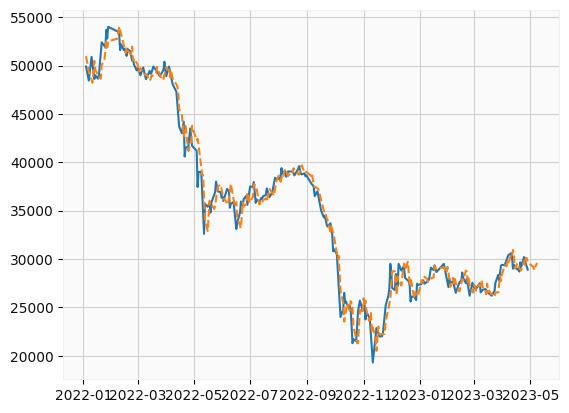

In [ ]:
plt.plot(tcb_data_feature_validate['open_t3'], '-')
plt.plot(tcb_data_feature_validate['open_t3_predict'], '--')
plt.show()

In [ ]:
from backtesting import Backtest
from backtesting import Strategy
from backtesting.lib import crossover
import math

class MyStrategy(Strategy):
    thresh_hold = 0.014

    def cash(self):
      return self.equity - sum([trade.value for trade in self.trades])

    # Do as much initial computation as possible
    def init(self):
      pass

    def next(self):
      cash = self.cash()
      if self.data.open_t3_predict[-1]/self.data.open_t1_predict[-1] - 1 > self.thresh_hold: #buy
            size = int(20_000_000 / (self.data.Close[-1]*(1 + 0.07)) / 100)*100
            self.buy(size=size)
      if len(self.trades) != 0:
        for trade in self.trades:
          if self.data.index[-2] >= trade.entry_time:
            trade.close()

In [ ]:
bt_train = Backtest(tcb_data_feature_train, MyStrategy, cash=20_000_000, commission=0.005)
optim = bt_train.optimize(
    thresh_hold = list(np.arange(0.0, 0.07, 0.001)),
    maximize = 'Return [%]',
)

bt_train.plot()

Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

Row(id='1407', ...)

In [ ]:
optim

Start                     2019-02-13 00:00:00
End                       2022-12-30 00:00:00
Duration                   1416 days 00:00:00
Exposure Time [%]                   10.655738
Equity Final [$]                   28451100.0
Equity Peak [$]                    29027700.0
Return [%]                            42.2555
Buy & Hold Return [%]               -6.170599
Return (Ann.) [%]                    9.527186
Volatility (Ann.) [%]                9.584094
Sharpe Ratio                         0.994062
Sortino Ratio                        1.935911
Calmar Ratio                         0.927581
Max. Drawdown [%]                     -10.271
Avg. Drawdown [%]                   -2.966834
Max. Drawdown Duration      681 days 00:00:00
Avg. Drawdown Duration      168 days 00:00:00
# Trades                                   37
Win Rate [%]                        59.459459
Best Trade [%]                       8.830846
Worst Trade [%]                     -4.786413
Avg. Trade [%]                    

In [ ]:
optim['_strategy']

<Strategy MyStrategy(thresh_hold=0.014)>

In [ ]:
bt_validate = Backtest(tcb_data_feature_validate, MyStrategy, cash=20_000_000, commission=0.005)
stats = bt_validate.run()
bt_validate.plot()

Row(id='2097', ...)

In [ ]:
stats

Start                     2022-01-04 00:00:00
End                       2023-05-08 00:00:00
Duration                    489 days 00:00:00
Exposure Time [%]                    7.250755
Equity Final [$]                   22115750.0
Equity Peak [$]                    22163900.0
Return [%]                           10.57875
Buy & Hold Return [%]              -42.239686
Return (Ann.) [%]                    7.956433
Volatility (Ann.) [%]                7.221753
Sharpe Ratio                         1.101732
Sortino Ratio                        2.210417
Calmar Ratio                         2.026961
Max. Drawdown [%]                   -3.925302
Avg. Drawdown [%]                   -2.176814
Max. Drawdown Duration      140 days 00:00:00
Avg. Drawdown Duration       71 days 00:00:00
# Trades                                    8
Win Rate [%]                             75.0
Best Trade [%]                       7.616424
Worst Trade [%]                     -4.786413
Avg. Trade [%]                    

In [ ]:
stats['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,400,82,84,37637.25,39000.0,545100.0,0.036207,2022-05-10,2022-05-12,2 days
1,800,221,223,22110.00,22350.0,192000.0,0.010855,2022-11-23,2022-11-25,2 days
2,800,224,226,23416.50,25200.0,1426800.0,0.076164,2022-11-28,2022-11-30,2 days
3,600,240,242,29145.00,27750.0,-837000.0,-0.047864,2022-12-20,2022-12-22,2 days
4,700,245,247,25728.00,26100.0,260400.0,0.014459,2022-12-27,2022-12-29,2 days
5,600,253,255,27939.00,27450.0,-293400.0,-0.017502,2023-01-09,2023-01-11,2 days
6,600,275,277,26984.25,27750.0,459450.0,0.028378,2023-02-15,2023-02-17,2 days
7,600,325,327,29346.00,29950.0,362400.0,0.020582,2023-04-26,2023-04-28,2 days
